<a href="https://colab.research.google.com/github/Ferst1/Olena-Kaspruk/blob/main/RinokPraci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [36]:
response=requests.get("https://uadata.net/work-positions/cities.json?0=Київ")
data_json=response.json()

In [37]:
df=pd.DataFrame(data_json["data"])



In [38]:
df.head()

,at,val
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [39]:
df.shape

(387, 2)

In [40]:
df.columns

Index(['at', 'val'], dtype='object')

In [41]:
df["at"] = pd.to_datetime(df["at"])

In [42]:
df.dtypes

at     datetime64[ns]
val             int64
dtype: object

Підготовка даних

In [43]:
df=df.rename(columns={"at":"Дата","val": "Вакансіі"})

In [44]:
df.head()

,Дата,Вакансіі
0,2022-05-23,31876
1,2022-05-24,31626
2,2022-05-25,31928
3,2022-05-26,34621
4,2022-05-27,35312


In [45]:
df.set_index('Дата',inplace=True)

Побудова графіків


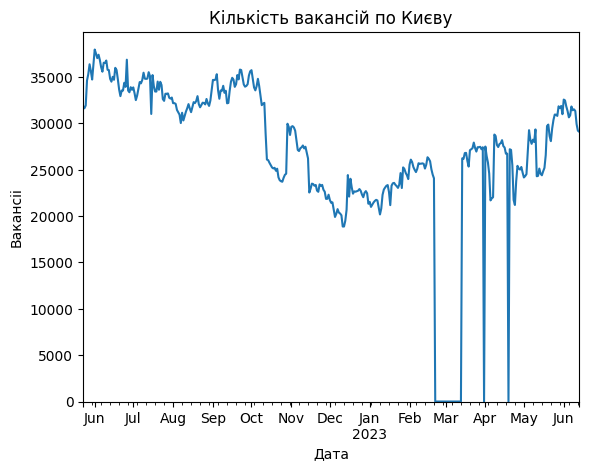

In [47]:
df["Вакансіі"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()

In [48]:
df["Вакансіі"]=df["Вакансіі"].replace(0,np.nan)
df ["Вакансіі"]=df["Вакансіі"].interpolate()

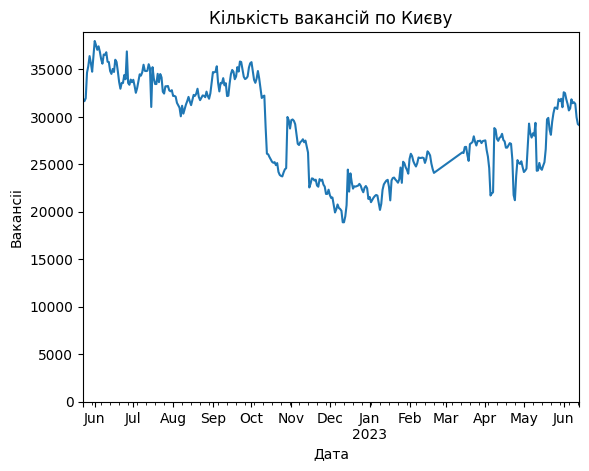

In [52]:
df["Вакансіі"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()

In [53]:
from pandas.core import window
df["rolling_mean"] =df["Вакансіі"].rolling(window=7).mean()

In [54]:
df

,Вакансіі,rolling_mean
Дата,,
2022-05-23,31876.0,NaN
2022-05-24,31626.0,NaN
2022-05-25,31928.0,NaN
2022-05-26,34621.0,NaN
2022-05-27,35312.0,NaN
...,...,...
2023-06-09,31507.0,31340.000000
2023-06-10,31335.0,31270.857143
2023-06-11,29922.0,31070.714286


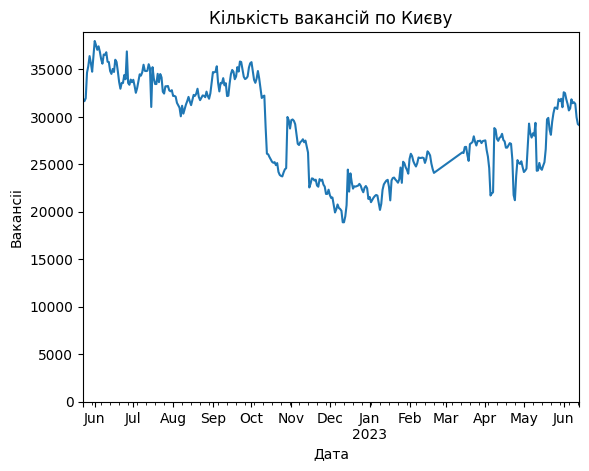

In [55]:
df["Вакансіі"].plot()
plt.title("Кількість вакансій по Києву")
plt.xlabel("Дата")
plt.ylabel("Вакансіі")
plt.ylim(bottom=0)
plt.show()


In [56]:
df.describe()

,Вакансіі,rolling_mean
count,387.000000,381.000000
mean,28449.512920,28403.834833
std,4798.153844,4703.391439
min,18872.000000,19806.428571
25%,24500.500000,24708.571429
50%,27475.000000,27322.571429
75%,32857.000000,33310.571429
max,37961.000000,37013.714286
